# Göteborgsvarvet

In [1]:
import geopandas as gpd
import fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10



In [2]:
import get_movescount
from get_movescount import Urls

In [3]:
session = get_movescount.get_session()

In [4]:
with open('authenticate.json','r') as file:
    authenticate = json.load(file)

In [5]:
get_movescount.login(session = session,email=authenticate['email'],password=authenticate['password'])

In [6]:
df_moves = get_movescount.get_overview(session = session)

In [7]:
df_moves.head()

,ActivityID,AvgHR,Distance,Duration,LocalStartTime,StartLatitude,StartLongitude,UTCStartTime,eventAuthor,eventAuthorGender,...,eventDataSourceScope,eventFeedId,eventFreshUntil,eventId,eventObjectId,eventObjectType,eventReceived,eventType,eventUpdated,objectFeedId
0,3,182.0,21332,5150.1,2018-05-19 13:03:24,57.680161,11.940248,2018-05-19 11:03:22,morke,m,...,production,371984,2018-05-21T11:03:22Z,73ed15dc-a12a-4de7-b637-8e8dd066d61c,218491095,move,2018-05-19T15:58:53.091Z,create,2018-05-19T15:58:53.091Z,move/218491095
1,3,NaN,4,58.8,2018-05-18 20:20:02,57.689058,11.925558,2018-05-18 18:19:58,morke,m,...,production,371984,2018-05-20T18:19:58Z,0c2b751a-7f23-4063-bfbb-0ac3b5b8c126,218491077,move,2018-05-19T15:58:52.215Z,create,2018-05-19T15:58:52.215Z,move/218491077
2,3,NaN,0,32.7,2018-05-18 20:11:06,57.689016,11.925500,2018-05-18 18:11:02,morke,m,...,production,371984,2018-05-20T18:11:02Z,fbb53d18-77d5-4a4c-b151-007a00045728,218491069,move,2018-05-19T15:58:48.035Z,create,2018-05-19T15:58:48.035Z,move/218491069
3,3,NaN,0,12.1,2017-10-05 19:14:08,NaN,NaN,NaT,morke,m,...,production,371984,2017-10-07T17:14:08Z,cdd6311c-344d-45da-b764-d5fee20b80e4,218312556,move,2018-05-18T17:39:25.937Z,create,2018-05-18T17:39:25.937Z,move/218312556
4,3,187.0,9616,2247.8,2017-05-29 18:00:08,NaN,NaN,NaT,morke,m,...,production,371984,2017-05-31T16:00:08Z,2515497d-5c45-4036-8c39-a325b41a5e0f,166184035,move,2017-07-13T21:25:39.360Z,create,2017-07-13T21:25:39.360Z,move/166184035


In [26]:
index = ((df_moves['LocalStartTime'] < pd.Timestamp('2014-06')) )
df_moves.loc[index]

,ActivityID,AvgHR,Distance,Duration,LocalStartTime,StartLatitude,StartLongitude,UTCStartTime,eventAuthor,eventAuthorGender,...,eventDataSourceScope,eventFeedId,eventFreshUntil,eventId,eventObjectId,eventObjectType,eventReceived,eventType,eventUpdated,objectFeedId


In [9]:
index = df_moves['LocalStartTime'] == pd.Timestamp('2018-05-19 13:03:24')
move = df_moves.loc[index]
df_2018 = get_movescount.get_move(session=session,move = move)

In [10]:
df_2018.head()

,height,latitude,longitude,Heartrate,EnergyConsumption,Altitude,Cadence,Distance,Speed,VerticalSpeed
2018-05-19 13:03:24,17,57.680161,11.940248,148.000000,1.1,17.0,87.983111,14.0,3.500000,0.05
2018-05-19 13:03:26,17,57.680183,11.94036,154.256998,1.1,17.0,94.000000,14.0,3.500000,0.05
2018-05-19 13:03:29,17,57.680218,11.940541,161.000000,1.1,17.0,93.942590,26.0,3.626435,0.03
2018-05-19 13:03:32,18,57.680253,11.940741,162.000000,1.1,18.0,90.000000,38.0,3.925700,0.03
2018-05-19 13:03:35,18,57.680294,11.940945,163.256998,8.8,18.0,89.743002,51.0,4.100000,0.03


In [11]:
index = df_moves['LocalStartTime'] == pd.Timestamp('2017-05-20 13:04:36')
move = df_moves.loc[index]
df_2017 = get_movescount.get_move(session=session,move = move)

In [12]:
df_2017.head()

,height,latitude,longitude,Heartrate,EnergyConsumption,Altitude,Cadence,Distance,Speed,VerticalSpeed
2017-05-20 13:04:36,18.3999996185303,57.680162,11.940264,151.000000,1.100000,18.0,83.000000,13.0,3.1000,-0.01
2017-05-20 13:04:39,19,57.680191,11.940424,155.000000,1.100000,19.0,82.000000,13.0,3.2000,-0.01
2017-05-20 13:04:42,19,57.680226,11.940601,157.000000,1.100000,19.0,84.256998,24.0,3.3257,-0.01
2017-05-20 13:04:45,19,57.680265,11.940792,159.256998,3.078888,19.0,87.000000,36.0,3.5257,-0.03
2017-05-20 13:04:48,19,57.680297,11.940988,162.000000,8.800000,19.0,87.000000,49.0,3.7257,-0.03


In [38]:
df_2014 = get_movescount.get_move(session = session,event_id='32857227')
df_2016 = get_movescount.get_move(session = session,event_id='106343427')

In [39]:
df_2014.index = df_2014.index - df_2014.index[0]
df_2016.index = df_2016.index - df_2016.index[0]
df_2017.index = df_2017.index - df_2017.index[0]
df_2018.index = df_2018.index - df_2018.index[0]

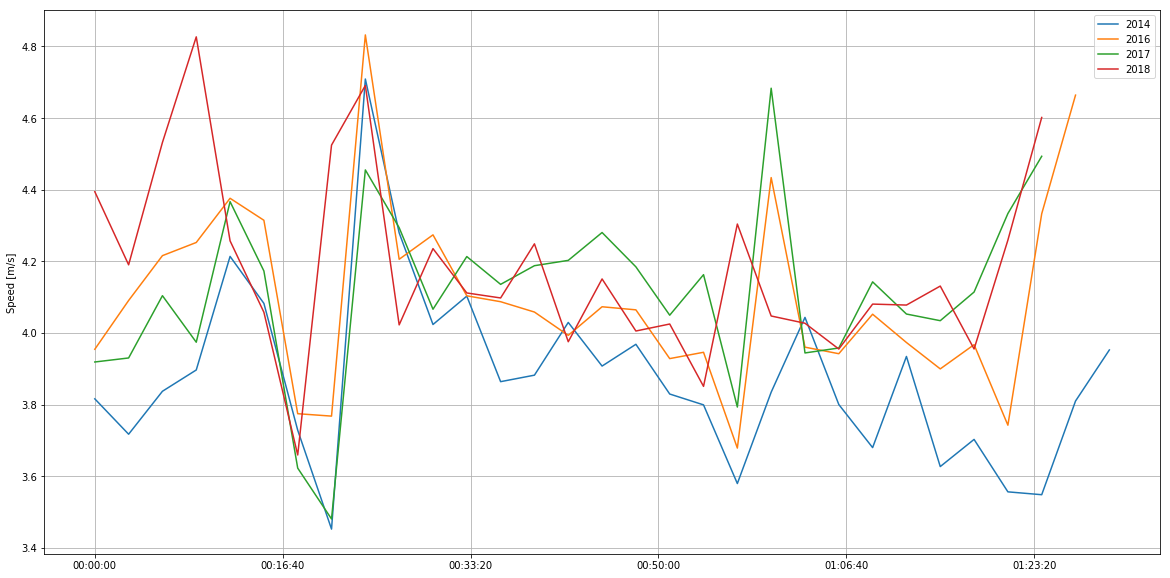

In [40]:
fig,ax = plt.subplots()

fig.set_size_inches(20,10)

df_2014.resample('3T').mean().plot(y = 'Speed',ax = ax,label = '2014')
df_2016.resample('3T').mean().plot(y = 'Speed',ax = ax,label = '2016')
df_2017.resample('3T').mean().plot(y = 'Speed',ax = ax,label = '2017')
df_2018.resample('3T').mean().plot(y = 'Speed',ax = ax,label = '2018')

ax.set_ylabel('Speed [m/s]')
ax.grid(True)

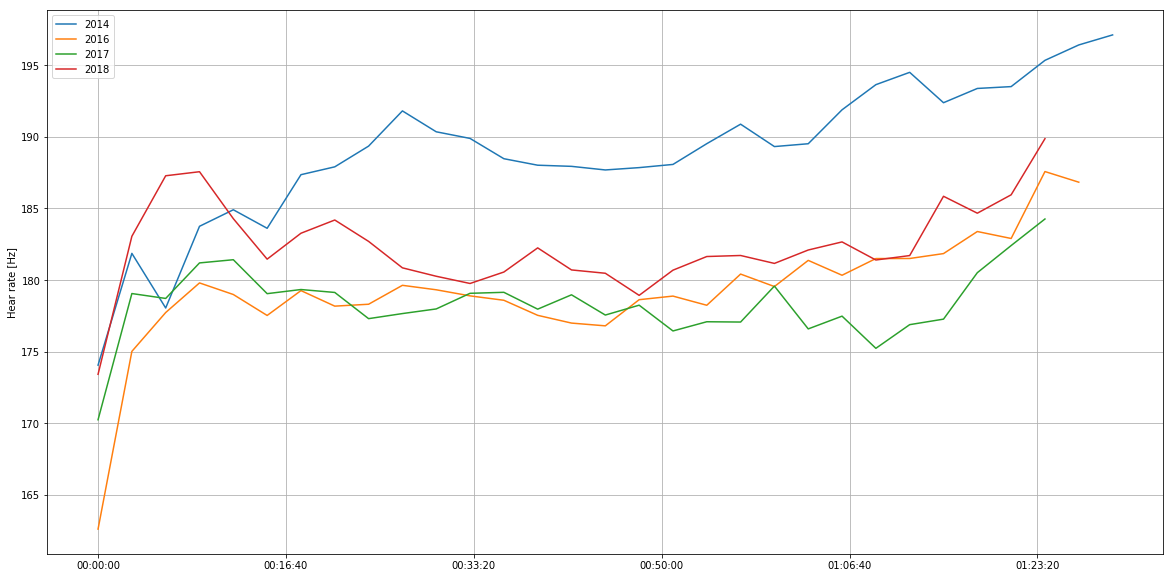

In [41]:
fig,ax = plt.subplots()

fig.set_size_inches(20,10)

df_2014.resample('3T').mean().plot(y = 'Heartrate',ax = ax,label = '2014')
df_2016.resample('3T').mean().plot(y = 'Heartrate',ax = ax,label = '2016')
df_2017.resample('3T').mean().plot(y = 'Heartrate',ax = ax,label = '2017')
df_2018.resample('3T').mean().plot(y = 'Heartrate',ax = ax,label = '2018')

ax.set_ylabel('Hear rate [Hz]')
ax.grid(True)

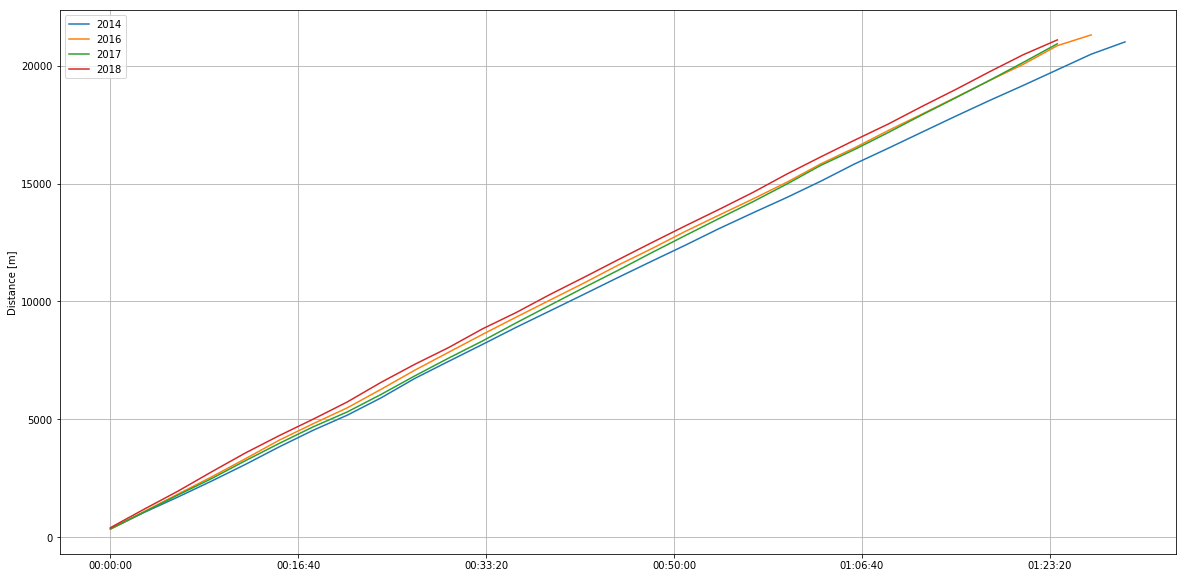

In [42]:
fig,ax = plt.subplots()

fig.set_size_inches(20,10)

df_2014.resample('3T').mean().plot(y = 'Distance',ax = ax,label = '2014')
df_2016.resample('3T').mean().plot(y = 'Distance',ax = ax,label = '2016')
df_2017.resample('3T').mean().plot(y = 'Distance',ax = ax,label = '2017')
df_2018.resample('3T').mean().plot(y = 'Distance',ax = ax,label = '2018')

ax.set_ylabel('Distance [m]')
ax.grid(True)